In [1]:
print("Hello World!")

Hello World!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='target'>

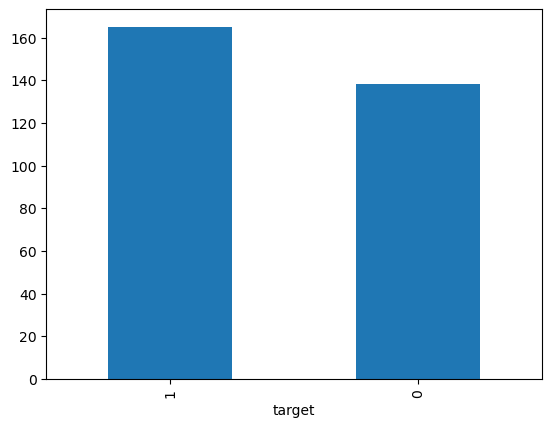

In [4]:
heart.target.value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

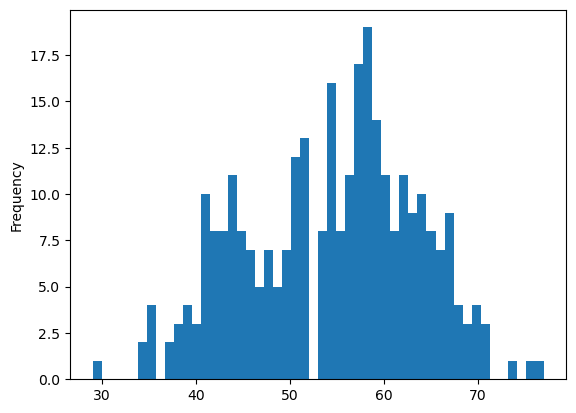

In [6]:
heart.age.plot.hist(bins=50)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

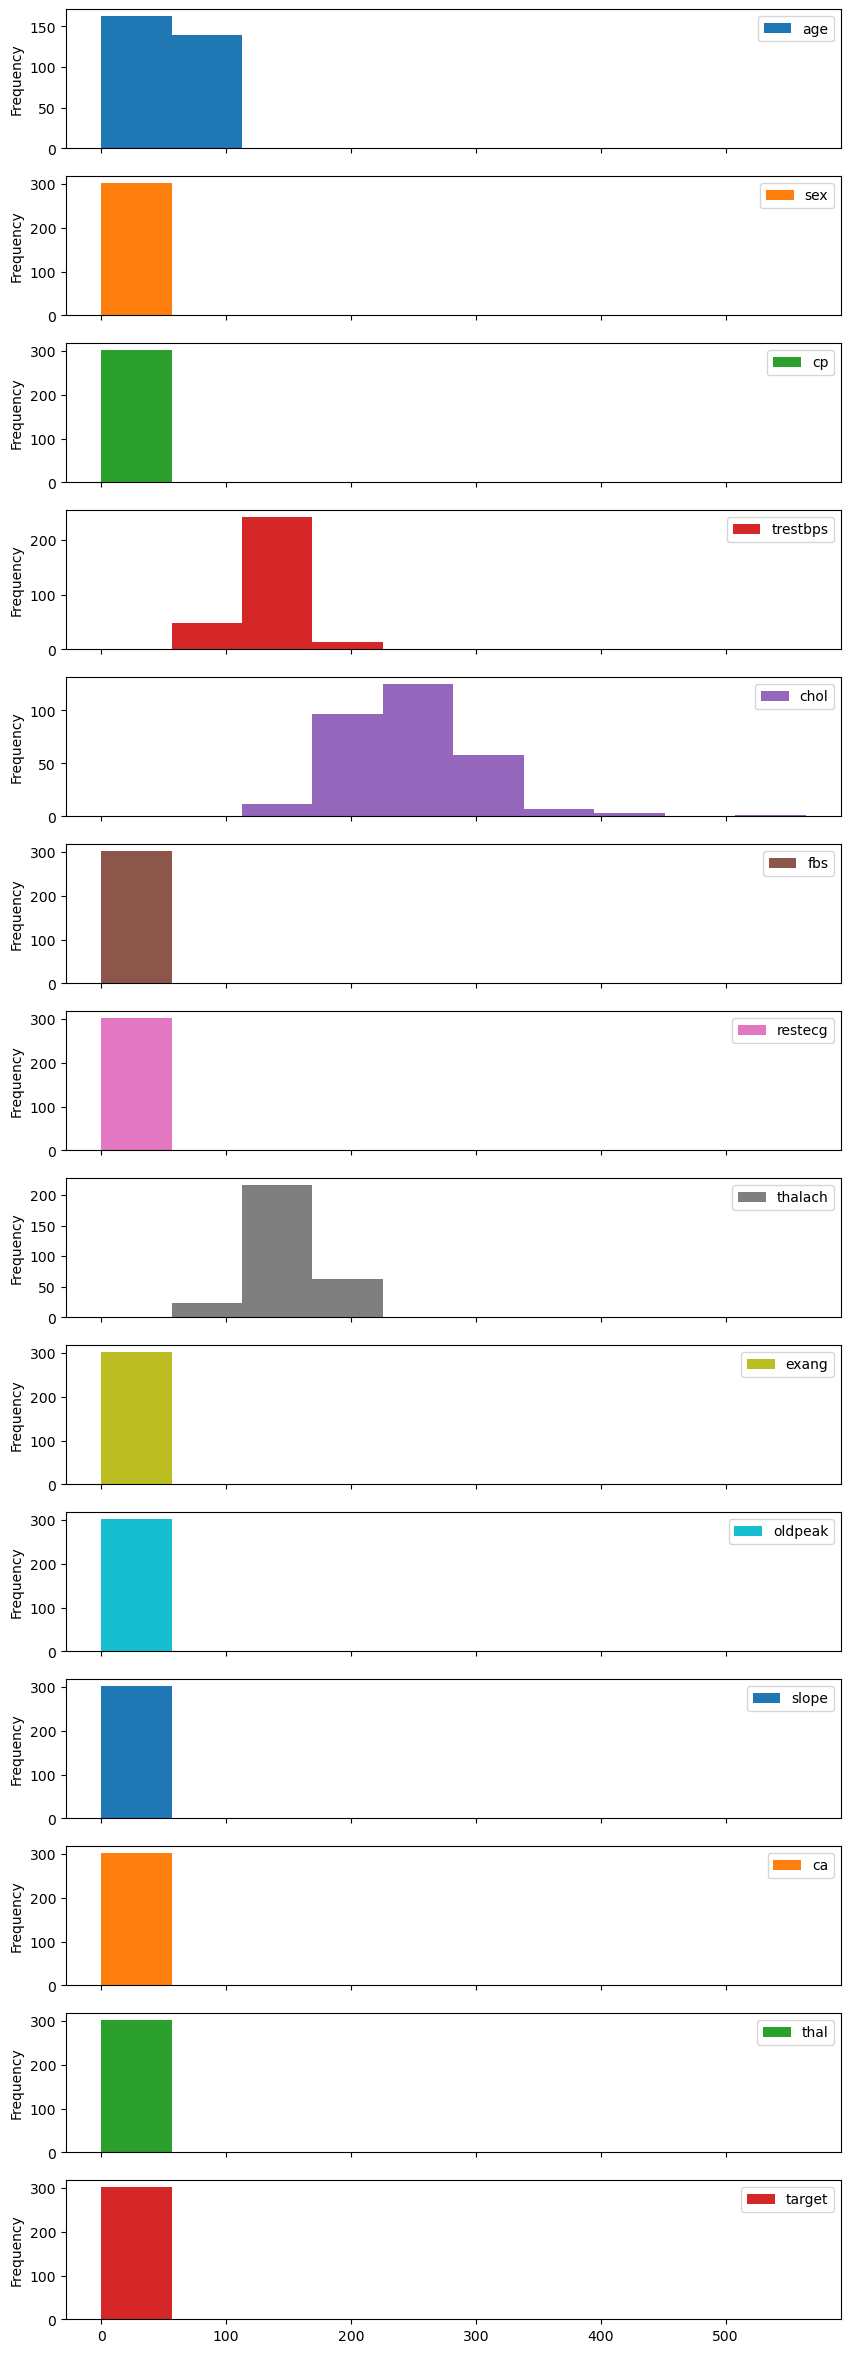

In [8]:
heart.plot.hist(figsize=(10,30),subplots=True)

<Axes: xlabel='age', ylabel='chol'>

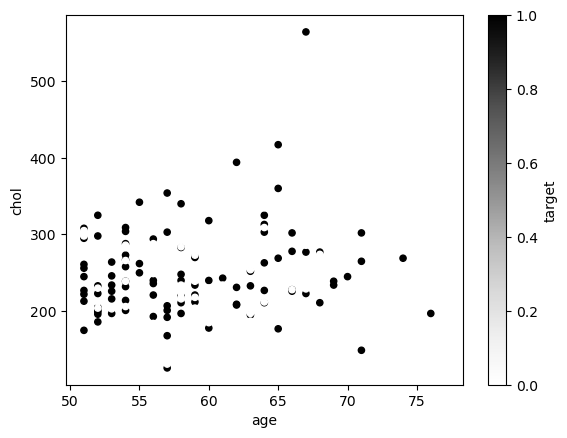

In [15]:
over50=heart[heart.age > 50]
over50.plot(kind='scatter', x='age', y='chol', c='target')

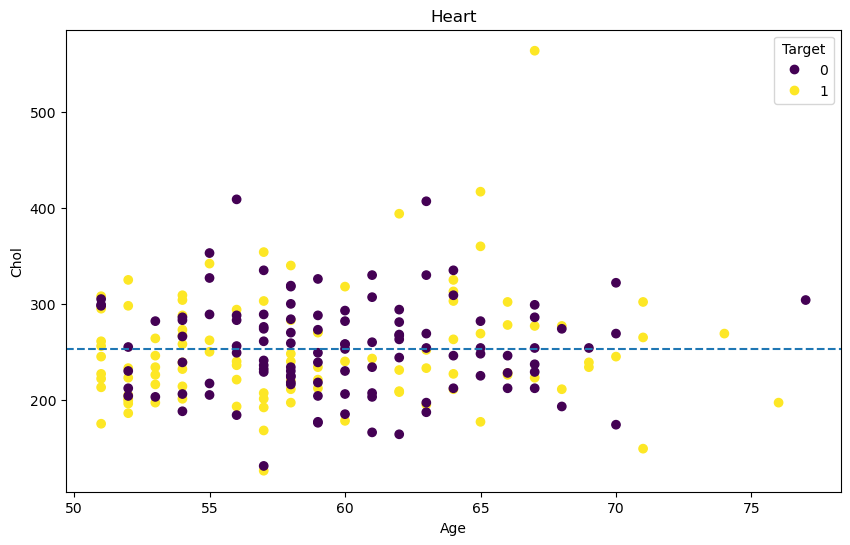

In [28]:
fix, ax = plt.subplots(figsize=(10,6))
# over50.plot(kind='scatter',x='age',y='chol',c='target',ax=ax)
# ax.set_xlim([45,100])
scatter = ax.scatter(x=over50.age, y=over50.chol, c=over50.target)
ax.set(title="Heart", xlabel="Age", ylabel="Chol")

ax.legend(*scatter.legend_elements(), title="Target")

ax.axhline(over50.chol.mean(), linestyle="--")

In [33]:
plt.style.available[:2]
plt.style.use('Solarize_Light2')

Text(0.5, 0.98, 'Heart')

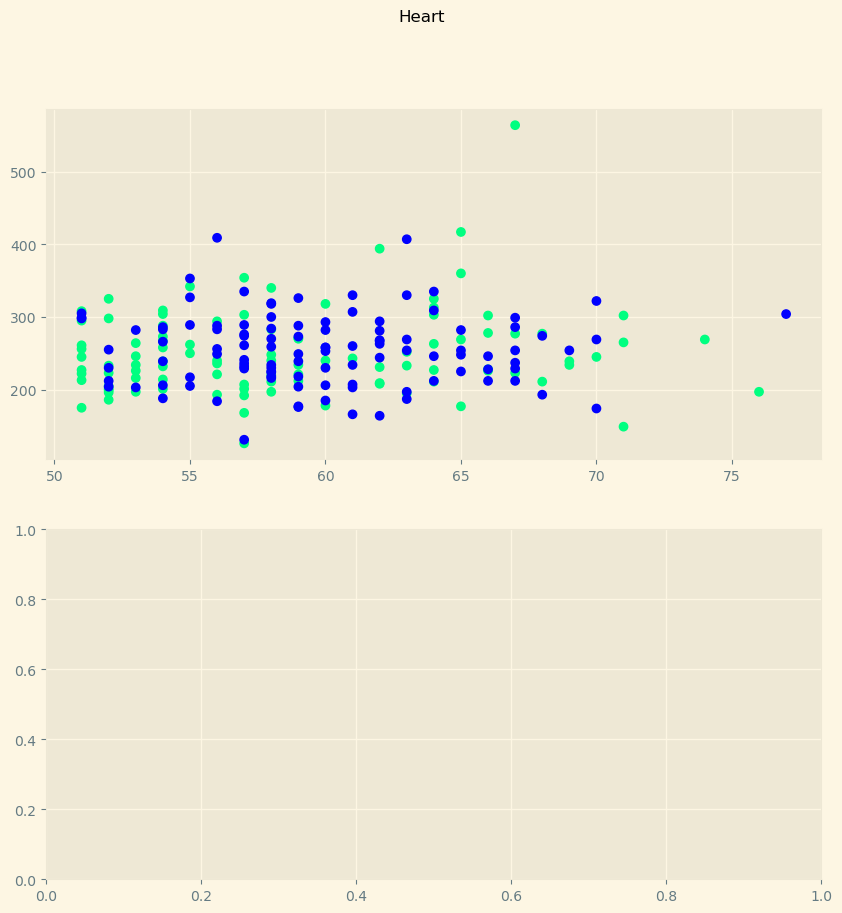

In [35]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
scatter = ax0.scatter(x=over50.age, y=over50.chol, c=over50.target, cmap='winter')
fig.suptitle("Heart")

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart.index

RangeIndex(start=0, stop=303, step=1)
303


In [ ]:
heart.loc[2]
heart.iloc[2]

In [31]:
heart.age
heart[heart.age > 72]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [36]:
pd.crosstab(heart.age, heart.sex).head(4)

sex,0,1
age,,
29,0,1
34,1,1
35,1,3
37,1,1


In [39]:
heart.groupby(["sex"]).mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


sex
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
dtype: object

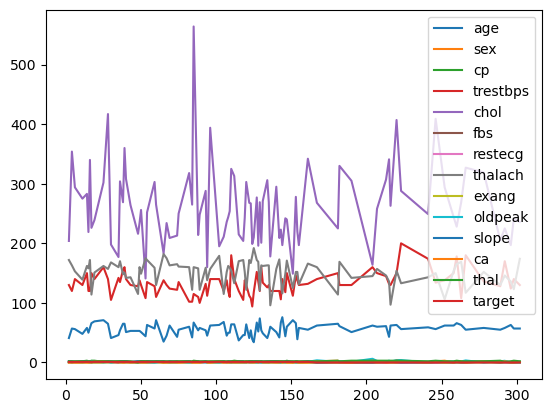

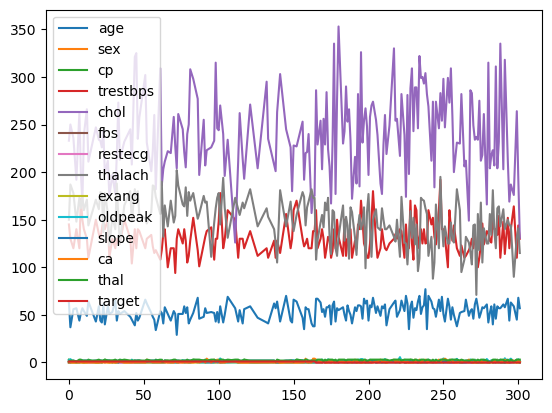

In [43]:
heart.groupby(["sex"]).plot()

sex
0    [[Axes(0.125,0.722857;0.158163x0.157143), Axes...
1    [[Axes(0.125,0.722857;0.158163x0.157143), Axes...
dtype: object

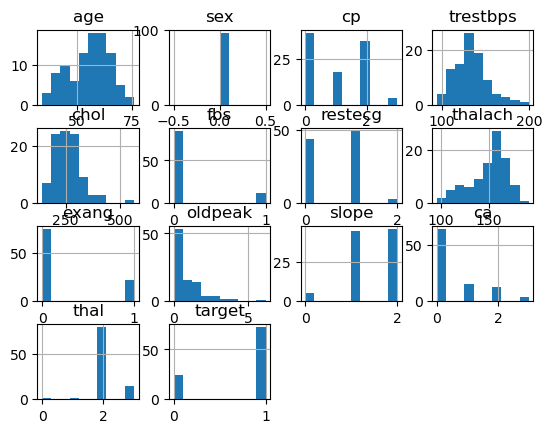

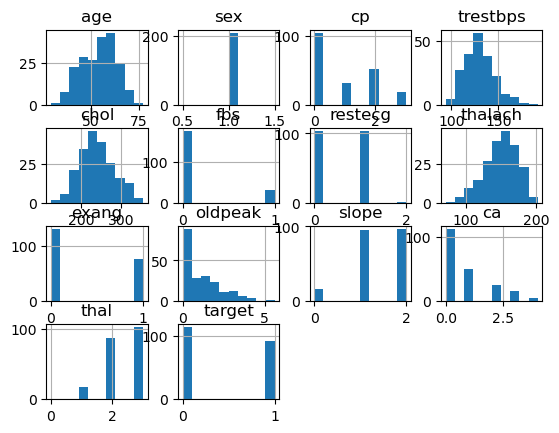

In [44]:
heart.groupby(["sex"]).hist()

------
[ 2  4  6  8 10  5]
sum :  35
mean :  5.833333333333333
var :  6.805555555555556
std :  2.608745973749755
mean :  [-3.83333333 -1.83333333  0.16666667  2.16666667  4.16666667 -0.83333333]
sq :  [14.69444444  3.36111111  0.02777778  4.69444444 17.36111111  0.69444444]
var :  6.805555555555555
std :  2.6087459737497545


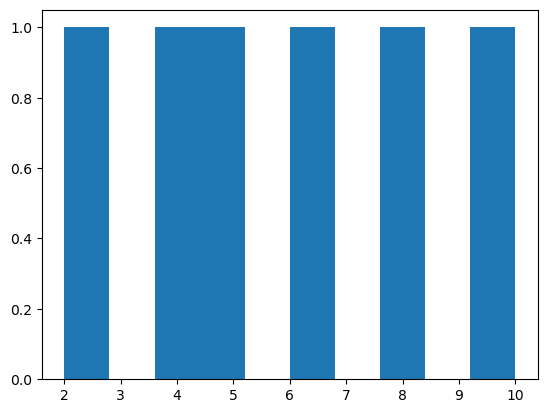

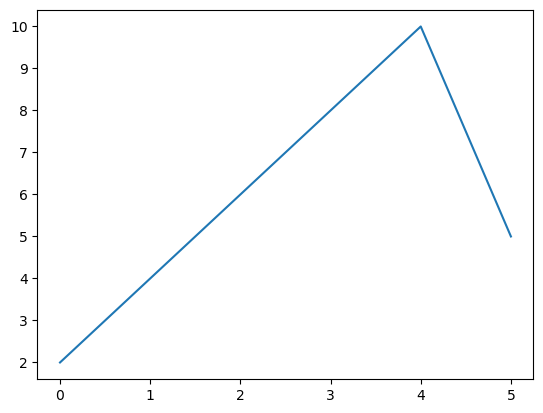

------
[   1  100  200  300 4000 5000]
sum :  9601
mean :  1600.1666666666667
var :  4296133.472222221
std :  2072.711623024829
mean :  [-1599.16666667 -1500.16666667 -1400.16666667 -1300.16666667
  2399.83333333  3399.83333333]
sq :  [ 2557334.02777778  2250500.02777778  1960466.69444444  1690433.36111111
  5759200.02777778 11558866.69444444]
var :  4296133.472222222
std :  2072.7116230248294


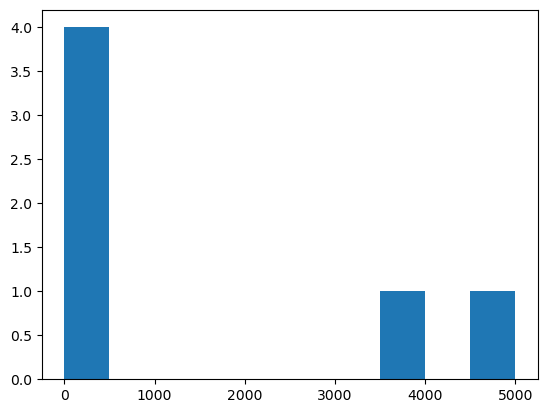

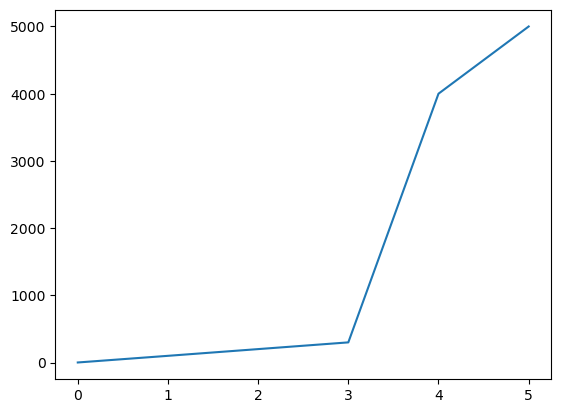

In [68]:
def varcalc(var_arr):
    # var_arr = var_arr / var_arr.max()
    print(var_arr)
    print("sum : ", var_arr.sum())
    print("mean : ", var_arr.mean())
    print("var : ", var_arr.var())
    print("std : ", var_arr.std())
    print("mean : ", var_arr - var_arr.mean())
    print("sq : ", np.square(var_arr - var_arr.mean()))
    varvar = np.sum(np.square(var_arr - var_arr.mean())/len(var_arr))
    print("var : ", varvar)
    var_std = np.sqrt(varvar)
    print("std : ", var_std)
    plt.hist(var_arr)
    plt.show()
    plt.plot(var_arr)

high_var = np.array([1,100,200,300,4000,5000])
low_var = np.array([2,4,6,8,10,5])

print("------")
varcalc(low_var)
plt.show()
print("------")
varcalc(high_var)

In [70]:
sales = np.random.randint(20, size=(5,3))
sales

array([[14, 17,  5],
       [13,  8,  9],
       [19, 16, 19],
       [ 5, 15, 15],
       [ 0, 18,  3]])

In [72]:
weeklysales = pd.DataFrame(sales,
                            index=["Mon","Tue","Wed","Thu","Fir"],
                            columns=["Almond","Peanut","Cashew"]) 
weeklysales

,Almond,Peanut,Cashew
Mon,14,17,5
Tue,13,8,9
Wed,19,16,19
Thu,5,15,15
Fir,0,18,3


In [76]:
prices=pd.DataFrame(np.array([10,8,12]).reshape(1,3),
                    index=["Price"],
                    columns=["Almond","Peanut","Cashew"])
prices

,Almond,Peanut,Cashew
Price,10,8,12


In [79]:
total=prices.dot(weeklysales.T)
total

,Mon,Tue,Wed,Thu,Fir
Price,336,302,546,350,180


In [82]:
weeklysales["Total"]=total.T
weeklysales

,Almond,Peanut,Cashew,Total
Mon,14,17,5,336
Tue,13,8,9,302
Wed,19,16,19,546
Thu,5,15,15,350
Fir,0,18,3,180


----------- Scikit -----------

In [40]:
# Create X (feature matrix)
X = heart.drop('target', axis=1)

# Create y (labels)
y = heart.target